# Predict Accidents

## Introduction

<p>Every year the lives of approximately 1.35 million people are cut short as a result of a road traffic crash. Between 20 and 50 million more people suffer non-fatal injuries, with many incurring a disability as a result of their injury.</p>
<p>Road traffic injuries cause considerable economic losses to individuals, their families, and nations. These losses arise from the cost of treatment as well as lost productivity for those killed or disabled by their injuries, and for family members who need to take time off work or school to care for the injured. Road traffic crashes cost most countries 3% of their gross domestic product.</p>
<p>Analyzing a significant range of factors, including weather conditions, special events, roadworks, traffic jams among others, an accurate prediction of the severity of the accidents can be performed.</p>
<p>These insights could allow law enforcement bodies to allocate their resources more effectively in advance of potential accidents, preventing when and where a severe accident can occur as well as saving both, time and money. In addition, this knowledge of a severe accident situation can be warned to drivers so that they would drive more carefully or even change their route if it is possible or to the hospital which could have set everything ready for a severe intervention in advance.</p>
<p>Governments should be highly interested in inaccurate predictions of the severity of an accident, in order to reduce the time of arrival and thus save a significant amount of people each year. Others interested could be private companies investing in technologies aiming to improve road safeness.</p>
<h2>Key Facts</h2>
<ol>
<li>Approximately 1.35 million people die each year as a result of road traffic crashes.</li>
<li>The 2030 Agenda for Sustainable Development has set an ambitious target of halving the global number of deaths and injuries from road traffic crashes by 2020.</li>
<li>Road traffic crashes cost most countries 3% of their gross domestic product.</li>
<li>More than half of all road traffic deaths are among vulnerable road users: pedestrians, cyclists, and motorcyclists.</li>
<li>93% of the world's fatalities on the roads occur in low- and middle-income countries, even though these countries have approximately 60% of the world's vehicles.</li>
<li>Road traffic injuries are the leading cause of death for children and young adults aged 5-29 years.</li>
</ol>
<h2>Risk factors</h2>
<p>The Safe System approach: accommodating human error The Safe System approach to road safety aims to ensure a safe transport system for all road users. Such an approach considers people&rsquo;s vulnerability to serious injuries in road traffic crashes and recognizes that the system should be designed to be forgiving of human error. The cornerstones of this approach are safe roads and roadsides, safe speeds, safe vehicles, and safe road users, all of which must be addressed in order to eliminate fatal crashes and reduce serious injuries.</p>
<ol>
<li>Speeding</li>
<li>Driving under the influence of alcohol and other psychoactive substances</li>
<li>Nonuse of motorcycle helmets, seatbelts, and child restraints</li>
<li>Distracted driving</li>
<li>Unsafe road infrastructure</li>
<li>Unsafe vehicles</li>
<li>Inadequate post-crash care</li>
<li>Inadequate law enforcement of traffic laws</li>
</ol>
<h2><strong>Role of Data Science</strong> to address road traffic injuries?</h2>
<p>Analyzing a significant range of factors, including weather conditions, special events, roadworks, traffic jams among others, an accurate prediction of the severity of the accidents can be performed.</p>

## Data

<p>The dataset is taken from <a href="https://www.kaggle.com/ahmedlahlou/accidents-in-france-from-2005-to-2016">Kaggle</a>, and consist of 5 tables:</p>
<ol>
<li>caracteristics.csv</li>
<li>holidays.csv</li>
<li>places.csv</li>
<li>users.csv</li>
<li>vehicles.csv</li>
</ol>
<p>As we have a large dataset, we have few choices to select our feature which would help us determine or predict the severity of the accident. One of the features which I feel is vital in the dataset is "grav", present in the users.csv dataset. This feature represents the severity of the injure of each person involved in the accident. The aim of this project is to&nbsp;predict the severity of the accident, so we will predict the feature "grav" from the dataset, considering all the other characteristics of an accident.<br />This feature has four categories of the accident:</p>
<ol>
<li>Unscathed</li>
<li>Killed</li>
<li>Hospitalized wounded</li>
<li>Light injury</li>
</ol>
<p>Now we have selected our feature so its time to plan for EDA. We need to consider the transformation of data based on supervised learning with categorical data. To use simpler algorithms the feature can be modified to have only two categories</p>
<ol>
<li>Light Injury (combine grav type 1 &amp; 4)&nbsp;</li>
<li>Serious Injury and Death (combine grav type 2 &amp; 3)&nbsp;</li>
</ol>
<p>&nbsp;</p>

# Import Libraries

In [220]:
import numpy as np # linear algebra
import pandas as pd # data processing
import seaborn as sns # data visualization
%matplotlib inline
from matplotlib import pyplot as plt # data visualization
from matplotlib import style # data visualization

# Read Data

Here, I am leaving out the "holidays" dataset as it may not relevent to predict the severity of the accident. The vehicle dataset contain invalid values in the column which we are most interedted in i.e. "catv" which describles the category of vehicle. 1-13 are the valid values but the acutal values range from 1-99.  

In [221]:
caracteristics_df = pd.read_csv('data/caracteristics.csv', low_memory = False, encoding = 'latin-1')
places_df = pd.read_csv('data/places.csv', low_memory = False)
users_df = pd.read_csv('data/users.csv', low_memory = False)

Lets perform some analysis on our data to know about its size, type, and content

In [222]:
users_df.describe()

,Num_Acc,place,catu,grav,sexe,trajet,secu,locp,actp,etatp,an_nais
count,1.876005e+06,1.775639e+06,1.876005e+06,1.876005e+06,1.876005e+06,1.875636e+06,1.832547e+06,1.874341e+06,1.874232e+06,1.874299e+06,1.873654e+06
mean,2.009992e+11,1.283953e+00,1.341410e+00,2.513080e+00,1.328885e+00,3.075555e+00,1.822304e+01,2.242522e-01,2.762860e-01,1.023823e-01,1.972682e+03
std,3.464316e+08,9.058402e-01,6.334311e-01,1.332745e+00,4.698081e-01,2.676239e+00,1.977354e+01,8.722973e-01,1.051576e+00,3.800489e-01,1.834448e+01
min,2.005000e+11,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.896000e+03
25%,2.007000e+11,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.961000e+03
50%,2.010000e+11,1.000000e+00,1.000000e+00,3.000000e+00,1.000000e+00,4.000000e+00,1.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.976000e+03
75%,2.013000e+11,1.000000e+00,2.000000e+00,4.000000e+00,2.000000e+00,5.000000e+00,2.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.987000e+03
max,2.016001e+11,9.000000e+00,4.000000e+00,4.000000e+00,2.000000e+00,9.000000e+00,9.300000e+01,8.000000e+00,9.000000e+00,3.000000e+00,2.016000e+03


In [223]:
places_df.describe()

,Num_Acc,catr,v1,circ,nbv,pr,pr1,vosp,prof,plan,lartpc,larrout,surf,infra,situ,env1
count,8.399850e+05,839984.000000,332816.000000,839187.000000,838195.000000,414770.000000,413463.000000,838345.000000,838924.000000,838909.000000,830440.000000,831706.000000,838968.000000,838707.000000,838983.000000,838709.000000
mean,2.010011e+11,3.418247,0.068575,1.855246,2.039593,109.701206,276.792763,0.130675,1.135474,1.198732,5.256996,58.389998,1.257012,0.438958,1.147201,37.916588
std,3.458009e+08,1.207917,0.567640,0.720949,1.550779,499.309309,357.941312,0.555434,0.620295,0.722200,21.801291,62.527755,0.954748,1.350905,0.722495,47.979898
min,2.005000e+11,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-81.000000,0.000000,0.000000,0.000000,0.000000
25%,2.007000e+11,3.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
50%,2.010000e+11,4.000000,0.000000,2.000000,2.000000,6.000000,100.000000,0.000000,1.000000,1.000000,0.000000,60.000000,1.000000,0.000000,1.000000,0.000000
75%,2.013000e+11,4.000000,0.000000,2.000000,2.000000,28.000000,500.000000,0.000000,1.000000,1.000000,0.000000,80.000000,1.000000,0.000000,1.000000,99.000000
max,2.016001e+11,9.000000,9.000000,4.000000,99.000000,9900.000000,9540.000000,3.000000,4.000000,4.000000,960.000000,999.000000,9.000000,7.000000,5.000000,99.000000


In [224]:
caracteristics_df.describe()

,Num_Acc,an,mois,jour,hrmn,lum,agg,int,atm,col,com,lat,dep
count,8.399850e+05,839985.000000,839985.000000,839985.000000,839985.000000,839985.000000,839985.000000,839985.000000,839930.000000,839974.000000,839983.000000,3.624710e+05,839985.000000
mean,2.010011e+11,10.011129,6.679437,15.594687,1381.093505,1.912588,1.685924,1.694066,1.547116,4.187484,186.510172,2.849715e+06,564.257671
std,3.458009e+08,3.458059,3.389489,8.750201,540.757462,1.517900,0.464147,1.510792,1.587668,1.974998,171.873105,2.284591e+06,291.153083
min,2.005000e+11,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000e+00,10.000000
25%,2.007000e+11,7.000000,4.000000,8.000000,1000.000000,1.000000,1.000000,1.000000,1.000000,3.000000,55.000000,0.000000e+00,310.000000
50%,2.010000e+11,10.000000,7.000000,15.000000,1446.000000,1.000000,2.000000,1.000000,1.000000,3.000000,118.000000,4.370200e+06,630.000000
75%,2.013000e+11,13.000000,10.000000,23.000000,1810.000000,3.000000,2.000000,2.000000,1.000000,6.000000,278.000000,4.799218e+06,780.000000
max,2.016001e+11,16.000000,12.000000,31.000000,2359.000000,5.000000,2.000000,9.000000,9.000000,7.000000,987.000000,5.564823e+06,976.000000


In [225]:
print("Characteristics: ", caracteristics_df["Num_Acc"].count())
print("Places: ", places_df["Num_Acc"].count())
print("User: ", users_df["Num_Acc"].count())


Characteristics:  839985
Places:  839985
User:  1876005


### Remark

I know that usually, it is better to split between the Train and the Test set before doing the preprocessing, in order not to bias the model with information from the Test data.

But here, the only preprocessing that I am applying to the data is filling missing values, cleaning outliers, and calculations to format the data. No information relative to the data is used so the model will not be biased.

# Preprocessing

Before starting to run any ML algorithm on the data, we have to go through the preprocessing part.
In this part, we will keep only interesting features, and then clean the data so there is no missing or unusual value. The goal is that our data is the best possible before applying the algorithm.

We will do the first part of the preprocessing separately for each dataset.

As detailled in the report, my goal is to build a model that could be used in the future to help emergency services be more efficient for road accident. Thus, I want to keep only features that could be used as input data known by this services to predict the severity of the accident.

It means that the features kept are only the information known thanks to the description of the accident given when calling emergency or other information that can be infered from this.

## Processing of user dataset

In [226]:
users_df.columns

Index(['Num_Acc', 'place', 'catu', 'grav', 'sexe', 'trajet', 'secu', 'locp',
       'actp', 'etatp', 'an_nais', 'num_veh'],
      dtype='object')

The columns in user datasets are not much relevent so we can remove all the columns except "grav" which is our target column.

In [227]:
users_df = users_df.drop(['place', 'catu', 'sexe', 'trajet', 'secu', 'locp', 'actp', 'etatp', 'an_nais', 'num_veh'], axis=1)
users_df.head()

,Num_Acc,grav
0,201600000001,1
1,201600000001,3
2,201600000002,3
3,201600000002,3
4,201600000002,3


<p>&nbsp;</p>
<p>As mentioned in the <strong>Data section</strong> we will transform the "grav" features to binary data by merging category 1 and 4, similarly merge category 2 and 3.</p>
<table style="float: left;" border="10" width="221">
<tbody>
<tr>
<td width="93">Unscathed</td>
<td rowspan="2" width="64">0</td>
<td rowspan="2" width="64">Light</td>
</tr>
<tr>
<td>Light injury</td>
</tr>
<tr>
<td>Killed</td>
<td rowspan="2">1</td>
<td rowspan="2">Severe</td>
</tr>
<tr>
<td>Serious Injury</td>
</tr>
</tbody>
</table>
<p>&nbsp;</p>

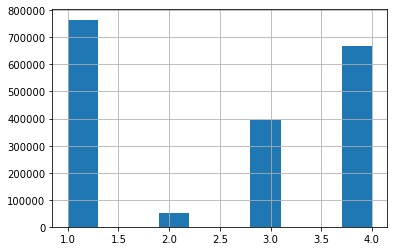

In [228]:
users_df.grav.hist()

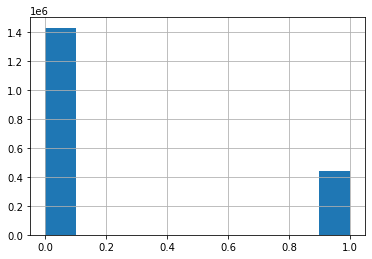

In [229]:
users_df = users_df.replace(1,0)
users_df = users_df.replace(3,1)
users_df = users_df.replace(4,0)
users_df = users_df.replace(2,1)

users_df.grav.hist()

We will merge the rows based on "Num_Acc" feature because for one accident there could be number of users involved in it. As our aim is to tell the severity of the accident, we will consider the maximum gravity of accident and keep it and ignore the other ones. 

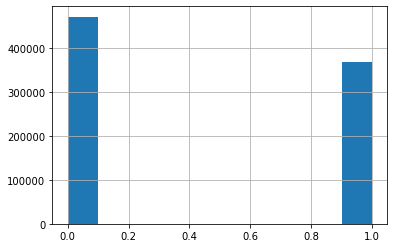

In [230]:
users_df = users_df.groupby(['Num_Acc'], as_index=False).max()

users_df.grav.hist()

Now we see that there is 839985 instances in the database, the same number as in the others

In [231]:
users_df.count()

Num_Acc    839985
grav       839985
dtype: int64

In [232]:
users_df.head(15)

,Num_Acc,grav
0,200500000001,1
1,200500000002,1
2,200500000003,1
3,200500000004,1
4,200500000005,1
5,200500000006,1
6,200500000007,0
7,200500000008,1
8,200500000009,1
9,200500000010,1


## Processing of places dataset

In [233]:
places_df.describe()

,Num_Acc,catr,v1,circ,nbv,pr,pr1,vosp,prof,plan,lartpc,larrout,surf,infra,situ,env1
count,8.399850e+05,839984.000000,332816.000000,839187.000000,838195.000000,414770.000000,413463.000000,838345.000000,838924.000000,838909.000000,830440.000000,831706.000000,838968.000000,838707.000000,838983.000000,838709.000000
mean,2.010011e+11,3.418247,0.068575,1.855246,2.039593,109.701206,276.792763,0.130675,1.135474,1.198732,5.256996,58.389998,1.257012,0.438958,1.147201,37.916588
std,3.458009e+08,1.207917,0.567640,0.720949,1.550779,499.309309,357.941312,0.555434,0.620295,0.722200,21.801291,62.527755,0.954748,1.350905,0.722495,47.979898
min,2.005000e+11,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-81.000000,0.000000,0.000000,0.000000,0.000000
25%,2.007000e+11,3.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
50%,2.010000e+11,4.000000,0.000000,2.000000,2.000000,6.000000,100.000000,0.000000,1.000000,1.000000,0.000000,60.000000,1.000000,0.000000,1.000000,0.000000
75%,2.013000e+11,4.000000,0.000000,2.000000,2.000000,28.000000,500.000000,0.000000,1.000000,1.000000,0.000000,80.000000,1.000000,0.000000,1.000000,99.000000
max,2.016001e+11,9.000000,9.000000,4.000000,99.000000,9900.000000,9540.000000,3.000000,4.000000,4.000000,960.000000,999.000000,9.000000,7.000000,5.000000,99.000000


In this dataset, we will keep only the features: "road categorie", "traffic regime", "number of traffic lanes", "surface condition", and "infrastructure"

These are the only ones that seem relevant in the context of the model and its future usage.
In the "infra" feature, almost 90% of the data is equal to 0. The missing values are too important so we will drop the entire column.

In [234]:
places_df = places_df.drop(["v1", "voie", "v2", "pr", "pr1", "vosp", "prof", "plan", "lartpc", "larrout", "situ", "env1", "infra"], axis=1)

places_df.describe()

,Num_Acc,catr,circ,nbv,surf
count,8.399850e+05,839984.000000,839187.000000,838195.000000,838968.000000
mean,2.010011e+11,3.418247,1.855246,2.039593,1.257012
std,3.458009e+08,1.207917,0.720949,1.550779,0.954748
min,2.005000e+11,1.000000,0.000000,0.000000,0.000000
25%,2.007000e+11,3.000000,2.000000,2.000000,1.000000
50%,2.010000e+11,4.000000,2.000000,2.000000,1.000000
75%,2.013000e+11,4.000000,2.000000,2.000000,1.000000
max,2.016001e+11,9.000000,4.000000,99.000000,9.000000


From the description of the data, we can see that there are several missing values and outliers.

In [235]:
places_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 839985 entries, 0 to 839984
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   Num_Acc  839985 non-null  int64  
 1   catr     839984 non-null  float64
 2   circ     839187 non-null  float64
 3   nbv      838195 non-null  float64
 4   surf     838968 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 32.0 MB


The "catr" missing value is filled with a 9 which represents the "other" categorie, which seems the most appropriate.

In [236]:
places_df["catr"].isna().sum()

1

In [237]:
places_df["catr"] = places_df["catr"].fillna(9)
places_df["catr"] = places_df["catr"].astype(int)

We will replace the missing and null values by 2, which is largely the major category.

In [238]:
places_df["circ"].value_counts()

2.0    532823
1.0    149375
3.0    107855
0.0     44556
4.0      4578
Name: circ, dtype: int64

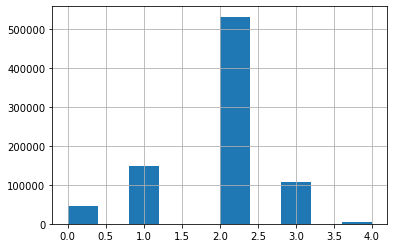

In [239]:
places_df["circ"].hist()
places_df["circ"] = places_df["circ"].fillna(2)
places_df["circ"] = places_df["circ"].replace(0,2)
places_df["circ"] = places_df["circ"].astype(int)

For the "nbv" feature, we count the missing values as well as the outliers (0 & above 6) and replace them by the value 2, which is the major value from far.

In [240]:
places_df["nbv"].isna().sum()

1790

In [241]:
places_df["nbv"] = places_df["nbv"].where(places_df["nbv"] < 6,0)

In [242]:
places_df["nbv"].value_counts().head(5)

2.0    464716
0.0    122899
1.0    101345
4.0     76934
3.0     66252
Name: nbv, dtype: int64

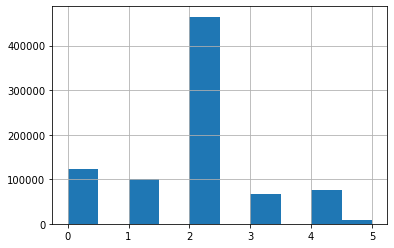

In [243]:
places_df["nbv"].hist()

In [244]:
places_df["nbv"] = places_df["nbv"].fillna(2)
places_df["nbv"] = places_df["nbv"].replace(0,2)
places_df["nbv"] = places_df["nbv"].astype(int)

Similarly, in the "surf" column, we replace missing and null values by the most frequent value, 1.

In [245]:
places_df["surf"].isna().sum()

1017

In [246]:
places_df["surf"].value_counts().head(5)

1.0    652322
2.0    143254
0.0     26998
7.0      5474
9.0      4483
Name: surf, dtype: int64

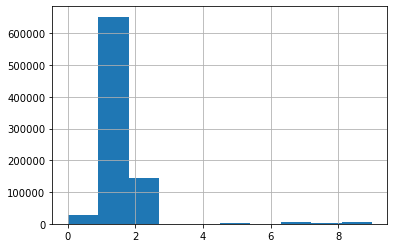

In [247]:
places_df["surf"].hist()

In [248]:
places_df["surf"] = places_df["surf"].fillna(1)
places_df["surf"] = places_df["surf"].replace(0,1)
places_df["surf"] = places_df["surf"].astype(int)

That is all, we have a desired dataset now.

In [249]:
places_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 839985 entries, 0 to 839984
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   Num_Acc  839985 non-null  int64
 1   catr     839985 non-null  int32
 2   circ     839985 non-null  int32
 3   nbv      839985 non-null  int32
 4   surf     839985 non-null  int32
dtypes: int32(4), int64(1)
memory usage: 19.2 MB


In [250]:
places_df.describe()

,Num_Acc,catr,circ,nbv,surf
count,8.399850e+05,839985.000000,839985.000000,839985.000000,839985.000000
mean,2.010011e+11,3.418254,1.961471,2.169398,1.288842
std,3.458009e+08,1.207931,0.571444,0.788149,0.927817
min,2.005000e+11,1.000000,1.000000,1.000000,1.000000
25%,2.007000e+11,3.000000,2.000000,2.000000,1.000000
50%,2.010000e+11,4.000000,2.000000,2.000000,1.000000
75%,2.013000e+11,4.000000,2.000000,2.000000,1.000000
max,2.016001e+11,9.000000,4.000000,5.000000,9.000000


## Caracteristics

In [251]:
caracteristics_df.describe()

,Num_Acc,an,mois,jour,hrmn,lum,agg,int,atm,col,com,lat,dep
count,8.399850e+05,839985.000000,839985.000000,839985.000000,839985.000000,839985.000000,839985.000000,839985.000000,839930.000000,839974.000000,839983.000000,3.624710e+05,839985.000000
mean,2.010011e+11,10.011129,6.679437,15.594687,1381.093505,1.912588,1.685924,1.694066,1.547116,4.187484,186.510172,2.849715e+06,564.257671
std,3.458009e+08,3.458059,3.389489,8.750201,540.757462,1.517900,0.464147,1.510792,1.587668,1.974998,171.873105,2.284591e+06,291.153083
min,2.005000e+11,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000e+00,10.000000
25%,2.007000e+11,7.000000,4.000000,8.000000,1000.000000,1.000000,1.000000,1.000000,1.000000,3.000000,55.000000,0.000000e+00,310.000000
50%,2.010000e+11,10.000000,7.000000,15.000000,1446.000000,1.000000,2.000000,1.000000,1.000000,3.000000,118.000000,4.370200e+06,630.000000
75%,2.013000e+11,13.000000,10.000000,23.000000,1810.000000,3.000000,2.000000,2.000000,1.000000,6.000000,278.000000,4.799218e+06,780.000000
max,2.016001e+11,16.000000,12.000000,31.000000,2359.000000,5.000000,2.000000,9.000000,9.000000,7.000000,987.000000,5.564823e+06,976.000000


Similarly for the "caracteristics" dataset, we keep only the interesting values: "month", "day of month", "time", "lighting", "agglomeration", "intersection", "atmospheric condition", "department"

In [252]:
caracteristics_df = caracteristics_df.drop(["an", "col", "com", "adr", "gps", "lat", "long"], axis=1)

caracteristics_df.describe()

,Num_Acc,mois,jour,hrmn,lum,agg,int,atm,dep
count,8.399850e+05,839985.000000,839985.000000,839985.000000,839985.000000,839985.000000,839985.000000,839930.000000,839985.000000
mean,2.010011e+11,6.679437,15.594687,1381.093505,1.912588,1.685924,1.694066,1.547116,564.257671
std,3.458009e+08,3.389489,8.750201,540.757462,1.517900,0.464147,1.510792,1.587668,291.153083
min,2.005000e+11,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,10.000000
25%,2.007000e+11,4.000000,8.000000,1000.000000,1.000000,1.000000,1.000000,1.000000,310.000000
50%,2.010000e+11,7.000000,15.000000,1446.000000,1.000000,2.000000,1.000000,1.000000,630.000000
75%,2.013000e+11,10.000000,23.000000,1810.000000,3.000000,2.000000,2.000000,1.000000,780.000000
max,2.016001e+11,12.000000,31.000000,2359.000000,5.000000,2.000000,9.000000,9.000000,976.000000


In [253]:
caracteristics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 839985 entries, 0 to 839984
Data columns (total 9 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   Num_Acc  839985 non-null  int64  
 1   mois     839985 non-null  int64  
 2   jour     839985 non-null  int64  
 3   hrmn     839985 non-null  int64  
 4   lum      839985 non-null  int64  
 5   agg      839985 non-null  int64  
 6   int      839985 non-null  int64  
 7   atm      839930 non-null  float64
 8   dep      839985 non-null  int64  
dtypes: float64(1), int64(8)
memory usage: 57.7 MB


For the "atm" feature, missing values are replaced by 1

In [254]:
caracteristics_df["atm"].isna().sum()


55

In [255]:
caracteristics_df["atm"] = caracteristics_df["atm"].fillna(1)
caracteristics_df["atm"] = caracteristics_df["atm"].astype(int)

For the "int" feature, missing values are replaced by 1

In [256]:
(caracteristics_df["int"] == 0).sum()

106

In [257]:
caracteristics_df["int"] = caracteristics_df["int"].replace(0,1)

For "hrmn" will keep information about the hour (2 first numbers).

So we can compute all the data in the column to keep only the 2 first digits: we divide by 100 and then floor the number.

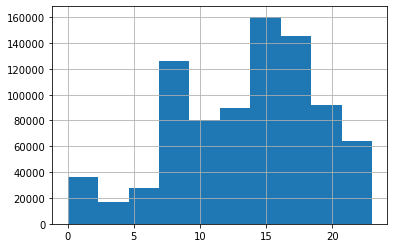

In [258]:
caracteristics_df["hrmn"] = caracteristics_df["hrmn"].div(100).apply(np.floor)
caracteristics_df["hrmn"] = caracteristics_df["hrmn"].astype(int)
caracteristics_df["hrmn"].hist()

A similar transformation is made to "dep", we will keep the department on a range 1 to 97, with 2 digits.

In [259]:
caracteristics_df["dep"] = caracteristics_df["dep"].div(10).apply(np.floor)
caracteristics_df["dep"] = caracteristics_df["dep"].astype(int)

Now we have a clear and nice "caracteristics" dataset

In [260]:
caracteristics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 839985 entries, 0 to 839984
Data columns (total 9 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   Num_Acc  839985 non-null  int64
 1   mois     839985 non-null  int64
 2   jour     839985 non-null  int64
 3   hrmn     839985 non-null  int32
 4   lum      839985 non-null  int64
 5   agg      839985 non-null  int64
 6   int      839985 non-null  int64
 7   atm      839985 non-null  int32
 8   dep      839985 non-null  int32
dtypes: int32(3), int64(6)
memory usage: 48.1 MB


In [261]:
caracteristics_df.describe()

,Num_Acc,mois,jour,hrmn,lum,agg,int,atm,dep
count,8.399850e+05,839985.000000,839985.000000,839985.000000,839985.000000,839985.000000,839985.000000,839985.000000,839985.000000
mean,2.010011e+11,6.679437,15.594687,13.559365,1.912588,1.685924,1.694192,1.547080,56.416155
std,3.458009e+08,3.389489,8.750201,5.411096,1.517900,0.464147,1.510692,1.587622,29.105356
min,2.005000e+11,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.007000e+11,4.000000,8.000000,10.000000,1.000000,1.000000,1.000000,1.000000,31.000000
50%,2.010000e+11,7.000000,15.000000,14.000000,1.000000,2.000000,1.000000,1.000000,63.000000
75%,2.013000e+11,10.000000,23.000000,18.000000,3.000000,2.000000,2.000000,1.000000,78.000000
max,2.016001e+11,12.000000,31.000000,23.000000,5.000000,2.000000,9.000000,9.000000,97.000000


## Merging

Lets merge the 3 datasets based on the feature "Num_acc", the Accident ID, as the primary key. Post merging we will drop "Num_acc" which is not useful in prediction.

In [262]:
from functools import reduce
accidents = reduce(lambda left, right: pd.merge(left, right, on = "Num_Acc"), [caracteristics_df, places_df, users_df])
accidents = accidents.drop("Num_Acc", axis=1)

In [263]:
data.describe()

,mois,jour,hrmn,lum,agg,int,atm,dep,catr,circ,nbv,surf,grav
count,839985.000000,839985.000000,839985.000000,839985.000000,839985.000000,839985.000000,839985.000000,839985.000000,839985.000000,839985.000000,839985.000000,839985.000000,839985.000000
mean,6.679437,15.594687,13.559365,1.912588,1.685924,1.694192,1.547080,56.416155,3.418254,1.961471,2.169398,1.288842,0.438448
std,3.389489,8.750201,5.411096,1.517900,0.464147,1.510692,1.587622,29.105356,1.207931,0.571444,0.788149,0.927817,0.496197
min,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,4.000000,8.000000,10.000000,1.000000,1.000000,1.000000,1.000000,31.000000,3.000000,2.000000,2.000000,1.000000,0.000000
50%,7.000000,15.000000,14.000000,1.000000,2.000000,1.000000,1.000000,63.000000,4.000000,2.000000,2.000000,1.000000,0.000000
75%,10.000000,23.000000,18.000000,3.000000,2.000000,2.000000,1.000000,78.000000,4.000000,2.000000,2.000000,1.000000,1.000000
max,12.000000,31.000000,23.000000,5.000000,2.000000,9.000000,9.000000,97.000000,9.000000,4.000000,5.000000,9.000000,1.000000


In [264]:
accidents.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 839985 entries, 0 to 839984
Data columns (total 13 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   mois    839985 non-null  int64
 1   jour    839985 non-null  int64
 2   hrmn    839985 non-null  int32
 3   lum     839985 non-null  int64
 4   agg     839985 non-null  int64
 5   int     839985 non-null  int64
 6   atm     839985 non-null  int32
 7   dep     839985 non-null  int32
 8   catr    839985 non-null  int32
 9   circ    839985 non-null  int32
 10  nbv     839985 non-null  int32
 11  surf    839985 non-null  int32
 12  grav    839985 non-null  int64
dtypes: int32(7), int64(6)
memory usage: 67.3 MB


In [265]:
accidents.describe()

,mois,jour,hrmn,lum,agg,int,atm,dep,catr,circ,nbv,surf,grav
count,839985.000000,839985.000000,839985.000000,839985.000000,839985.000000,839985.000000,839985.000000,839985.000000,839985.000000,839985.000000,839985.000000,839985.000000,839985.000000
mean,6.679437,15.594687,13.559365,1.912588,1.685924,1.694192,1.547080,56.416155,3.418254,1.961471,2.169398,1.288842,0.438448
std,3.389489,8.750201,5.411096,1.517900,0.464147,1.510692,1.587622,29.105356,1.207931,0.571444,0.788149,0.927817,0.496197
min,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,4.000000,8.000000,10.000000,1.000000,1.000000,1.000000,1.000000,31.000000,3.000000,2.000000,2.000000,1.000000,0.000000
50%,7.000000,15.000000,14.000000,1.000000,2.000000,1.000000,1.000000,63.000000,4.000000,2.000000,2.000000,1.000000,0.000000
75%,10.000000,23.000000,18.000000,3.000000,2.000000,2.000000,1.000000,78.000000,4.000000,2.000000,2.000000,1.000000,1.000000
max,12.000000,31.000000,23.000000,5.000000,2.000000,9.000000,9.000000,97.000000,9.000000,4.000000,5.000000,9.000000,1.000000


In [266]:
accidents.head(15)

,mois,jour,hrmn,lum,agg,int,atm,dep,catr,circ,nbv,surf,grav
0,2,1,14,1,2,1,8,59,3,2,2,1,1
1,3,16,18,1,2,6,1,59,3,1,2,1,1
2,7,13,19,1,1,1,1,59,3,2,2,2,1
3,8,15,19,2,2,1,7,59,4,2,2,1,1
4,12,23,11,1,2,3,1,59,4,2,2,1,1
5,12,23,11,1,2,1,7,59,3,2,2,1,1
6,5,1,11,1,2,1,7,59,3,2,2,1,0
7,5,14,19,2,1,1,1,59,3,2,2,1,1
8,9,23,19,1,2,1,1,59,4,2,2,1,1
9,12,30,10,1,1,1,9,59,4,2,2,7,1


# Split Train/Test/Validation

It is a good idea to split the dataset into training set and testing set. We will perform this action now.
The ratio between training and testing set would 80:20.
Training set is further split into the actual train set and a validation set, with a ratio of 80:20.

In [267]:
from sklearn import preprocessing

Feature = accidents[['mois','jour','hrmn','lum','agg','int','atm','dep','catr','circ','nbv','surf']]
Y = accidents[['grav']]
X = preprocessing.StandardScaler().fit(Feature).transform(Feature) #Normalize your data
X[0:5]

array([[-1.38057397, -1.66792681,  0.08143185, -0.60121757,  0.67667358,
        -0.45951952,  4.06452146,  0.08877564, -0.34625655,  0.06742446,
        -0.21493197, -0.31131385],
       [-1.08554405,  0.04632047,  0.82065412, -0.60121757,  0.67667358,
         2.85022346, -0.34459104,  0.08877564, -0.34625655, -1.68253017,
        -0.21493197, -0.31131385],
       [ 0.09457564, -0.29652899,  1.00545969, -0.60121757, -1.47781741,
        -0.45951952, -0.34459104,  0.08877564, -0.34625655,  0.06742446,
        -0.21493197,  0.76648572],
       [ 0.38960556, -0.06796268,  1.00545969,  0.05758766,  0.67667358,
        -0.45951952,  3.43464825,  0.08877564,  0.48160555,  0.06742446,
        -0.21493197, -0.31131385],
       [ 1.56972524,  0.84630253, -0.47298486, -0.60121757,  0.67667358,
         0.86437767, -0.34459104,  0.08877564,  0.48160555,  0.06742446,
        -0.21493197, -0.31131385]])

In [268]:
from sklearn.model_selection import train_test_split

X_training, X_test, y_training, y_test = train_test_split(accidents.drop("grav", axis=1), accidents["grav"], test_size=0.2, random_state=42)
X_train, X_Val, y_train, y_Val = train_test_split(X_training, y_training, test_size=0.2, random_state=42)

# Model

We import metrics to measure the relevance of each RF Classifier

In [269]:
import time
from sklearn.metrics import accuracy_score

## Random Forest

In [270]:
from sklearn.ensemble import RandomForestClassifier

In [271]:
t0=time.time()
model_rf = RandomForestClassifier(n_estimators=100,random_state=0, n_jobs=-1)
model_rf.fit(X_train,y_train)
print('Time taken :' , time.time()-t0)

Time taken : 77.29745888710022


# Validation

In [272]:
y_pred = model_rf.predict(X_Val)
score_rf = accuracy_score(y_Val,y_pred)
print('Accuracy :',score_rf)

Accuracy : 0.6909254602003005


Our goal will now be to improve the accuracy and running time of this model thanks to feature selection and hyperparameter tuning.

## Feature selection

We can measure the importance of each feature in the contribution to the prediction

In [273]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(model_rf.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')

In [274]:
importances

,importance
feature,
dep,0.233
jour,0.226
hrmn,0.140
mois,0.124
catr,0.070
agg,0.049
circ,0.034
nbv,0.032
int,0.031


Then we can conclude that we can delete the lowest importance features: "surf", "lum", "atm", "int", "nbv", "circ"

In [275]:
X_train = X_train.drop(["surf", "lum", "atm", "int", "nbv", "circ"], axis=1)
X_Val = X_Val.drop(["surf", "lum", "atm", "int", "nbv", "circ"], axis=1)
X_test = X_test.drop(["surf", "lum", "atm", "int", "nbv", "circ"], axis=1)

We train the Random Forest algorithm with the new dataset.

In [276]:
t0=time.time()
model_rf = RandomForestClassifier(n_estimators=100,random_state=0, n_jobs=-1)
model_rf.fit(X_train,y_train)
y_pred = model_rf.predict(X_Val)
score = accuracy_score(y_Val,y_pred)
print('Accuracy :',score)
print('Time taken :' , time.time()-t0)

Accuracy : 0.6639086891173975
Time taken : 67.49917602539062


We improved the running time but decreased slighlty the accuracy

## Hyperparameter tuning

In [277]:
t0=time.time()
model_rf = RandomForestClassifier(n_estimators=100, max_depth= 5, max_features= 3, random_state=0, n_jobs=-1)
model_rf.fit(X_train,y_train)
y_pred = model_rf.predict(X_Val)
score = accuracy_score(y_Val,y_pred)
print('Accuracy :',score)
print('Time taken :' , time.time()-t0)

Accuracy : 0.6946606348308755
Time taken : 29.019226551055908


In [279]:
t0=time.time()
model_rf = RandomForestClassifier(n_estimators=7, max_depth= 15, max_features= 6, random_state=0, n_jobs=-1)
model_rf.fit(X_train,y_train)
y_pred = model_rf.predict(X_Val)
score = accuracy_score(y_Val,y_pred)
print('Accuracy :',score)
print('Time taken :' , time.time()-t0)

Accuracy : 0.7116177324067322
Time taken : 6.666396856307983


With our final optimization, we reach a really better running time while increasing a bit the accuracy, from the original model

In [301]:
t0=time.time()
model_rf = RandomForestClassifier(n_estimators=7, max_depth= 15, max_features= 6, random_state=0, n_jobs=-1)
model_rf.fit(X_train,y_train)
y_pred = model_rf.predict(X_test)
score = accuracy_score(y_test,y_pred)
print('Accuracy :',score)
print('Time taken :' , time.time()-t0)


Accuracy : 0.7112805585814033
Time taken : 6.695050001144409


The Accuracy means that the model provides true predictions 71% of the times.

Having almost the same results than with the validation set is reassuring about the fact that our model is not overfitting.

It is an interesting measure to evaluate our model but in the context, other measures might be useful as well.

The recall here means that on all the serious accidents that happened, 61% have been predicted correctly

That is the measure that really interests us the most because we need to provide the needed services up to the severity of the accidents.

In [87]:
from sklearn.metrics import roc_curve, roc_auc_score

These scores can be explained partially because of the fact that there is more examples of "light injuries" than "serious accidents" :

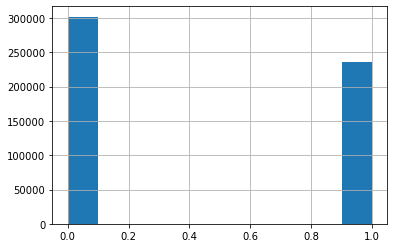

In [91]:
y_train.hist()

## ROC Curve

In [92]:
y_scores = model_rf.predict_proba(X_test)

In [93]:
y_scores = y_scores[:,1]

In [94]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_scores)

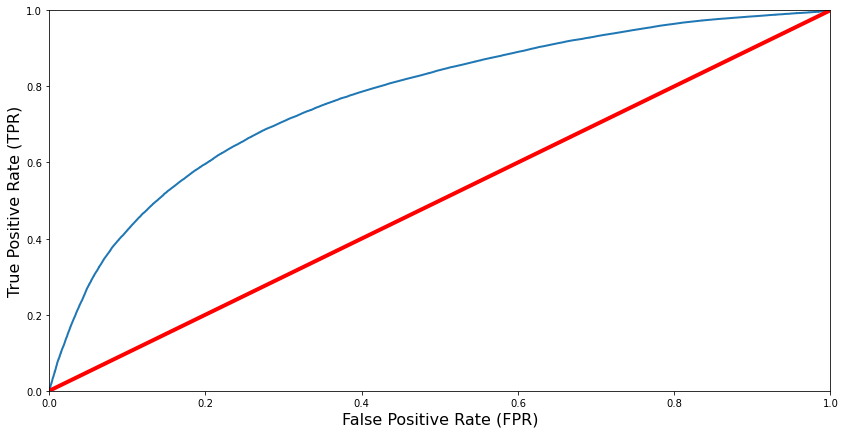

In [95]:
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)

plt.figure(figsize=(14, 7))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()

In [96]:
r_a_score = roc_auc_score(y_test, y_scores)

In [97]:
r_a_score

0.7685746441820174

In [99]:
model_rf.predict(np.array([[7, 5, 6, 2, 26, 6]]))

array([0], dtype=int64)

## KNN

In [281]:
from sklearn.neighbors import KNeighborsClassifier
t0=time.time()
k = 9 #3 values of k were tried, k= 9,19,29. k=9 had array([1,2,1,1,1]) while k=19 and k=29 had an array of 1's
standard_accuracy = np.zeros((k-1))
mean_accuracy = np.zeros((k-1))

neighbor = KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train.values.ravel())
neighbor

knn_yhat = neighbor.predict(X_test)
print('Time taken :' , time.time()-t0)
knn_yhat[0:5]


Time taken : 41.71495604515076


array([0, 1, 0, 1, 0], dtype=int64)

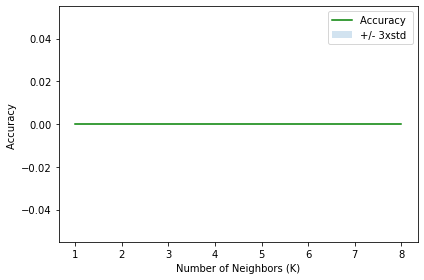

The best accuracy was with 0.0 with k= 1


In [282]:
k=9
plt.plot(range(1,k),mean_accuracy,'g')
plt.fill_between(range(1,k),mean_accuracy - 1 * standard_accuracy, mean_accuracy + 1 * standard_accuracy, alpha=0.20)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()
print( "The best accuracy was with", mean_accuracy.max(), "with k=", mean_accuracy.argmax()+1)

Lets use Decision Tree to see what type of results we can obtain from this model.

## Decision Tree

In [284]:
from sklearn.tree import DecisionTreeClassifier

newTree = DecisionTreeClassifier(criterion="entropy", max_depth = 200)
newTree
newTree.fit(X_train,y_train)
dt_yhat = newTree.predict(X_test)

In [285]:
print(dt_yhat[0:5]) #print first 5 predictions
print(y_test[0:5]) #compare to first 5 from y test.

[0 1 1 1 1]
171669    0
580715    0
92929     0
27334     1
413160    1
Name: grav, dtype: int64


Now that we have worked with training the model using both KNN as well as Decision Tree, the final method that we will be using today is Logistic Regression.

## Logistic Regression

In [286]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=8, solver='liblinear').fit(X_train,y_train.values.ravel())
LR

LogisticRegression(C=8, solver='liblinear')

In [287]:
#Lets go ahead and calculate the yhat for the linear regression model

lr_yhat = LR.predict(X_test)
lr_yhat

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [288]:
yhat_probability = LR.predict_proba(X_test)
yhat_probability

array([[0.67845101, 0.32154899],
       [0.62856156, 0.37143844],
       [0.67296115, 0.32703885],
       ...,
       [0.63612771, 0.36387229],
       [0.66950156, 0.33049844],
       [0.31716202, 0.68283798]])

In [292]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

#for knn
from sklearn.metrics import classification_report
cr = classification_report(y_test, knn_yhat)
print(cr)

              precision    recall  f1-score   support

           0       0.69      0.75      0.72     94315
           1       0.64      0.57      0.60     73682

    accuracy                           0.67    167997
   macro avg       0.66      0.66      0.66    167997
weighted avg       0.67      0.67      0.67    167997



In [305]:
#for LR
classification_report(y_test, lr_yhat)
print('Logistic Regression\n', classification_report(y_test, lr_yhat))

Logistic Regression
               precision    recall  f1-score   support

           0       0.65      0.80      0.72     94315
           1       0.64      0.46      0.54     73682

    accuracy                           0.65    167997
   macro avg       0.65      0.63      0.63    167997
weighted avg       0.65      0.65      0.64    167997



In [306]:
#for LR
classification_report(y_test, lr_yhat)
print('Logistic Regression\n', classification_report(y_test, lr_yhat))

Logistic Regression
               precision    recall  f1-score   support

           0       0.65      0.80      0.72     94315
           1       0.64      0.46      0.54     73682

    accuracy                           0.65    167997
   macro avg       0.65      0.63      0.63    167997
weighted avg       0.65      0.65      0.64    167997



In [307]:
#for decision tree
from sklearn.metrics import accuracy_score
predTree = newTree.predict(X_test)
print("Decision Trees's Accuracy is: ", accuracy_score(y_test, predTree))
print('Decision Trees\n', classification_report(y_test, predTree))

Decision Trees's Accuracy is:  0.6394459424870682
Decision Trees
               precision    recall  f1-score   support

           0       0.67      0.71      0.69     94315
           1       0.60      0.54      0.57     73682

    accuracy                           0.64    167997
   macro avg       0.63      0.63      0.63    167997
weighted avg       0.64      0.64      0.64    167997



In [304]:
print('Random Forest\n', classification_report(y_test, lr_yhat))

Random Forest
               precision    recall  f1-score   support

           0       0.65      0.80      0.72     94315
           1       0.64      0.46      0.54     73682

    accuracy                           0.65    167997
   macro avg       0.65      0.63      0.63    167997
weighted avg       0.65      0.65      0.64    167997



We can conclude, Random forest seems to be doing well overall. With the accuracy score to take into consideration, that the injuries will be only light.
Similarly, knowing this information can save some resources that can be more helpful to save other people that need it.